In [21]:
import numpy as np
import pandas as pd
import requests as request

In [22]:
df=pd.read_csv(r"C:\Users\ankit\OneDrive\Desktop\Mobile Price Range Prediction Project\dataset.csv")

In [23]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [24]:
x=df.iloc[:,:20]
y=df['price_range']

In [25]:
input_data = np.array([['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory',
                        'mobile_wt', 'mobile_depth', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
                        'three_g', 'touch_screen', 'wifi']])

In [26]:
import pandas as pd

df['blue'] = df['blue'].apply(lambda x: 'Yes' if x == 1 else 'No')
df['dual_sim'] = df['dual_sim'].apply(lambda x: 'Yes' if x == 1 else 'No')
df['four_g'] = df['four_g'].apply(lambda x: 'Yes' if x == 1 else 'No')
df['three_g'] = df['three_g'].apply(lambda x: 'Yes' if x == 1 else 'No')
df['touch_screen'] = df['touch_screen'].apply(lambda x: 'Yes' if x == 1 else 'No')
df['wifi'] = df['wifi'].apply(lambda x: 'Yes' if x == 1 else 'No')

df.tail(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,Yes,0.5,Yes,0,Yes,2,0.8,106,6,...,1222,1890,668,13,4,19,Yes,Yes,No,0
1996,1965,Yes,2.6,Yes,0,No,39,0.2,187,4,...,915,1965,2032,11,10,16,Yes,Yes,Yes,2
1997,1911,No,0.9,Yes,1,Yes,36,0.7,108,8,...,868,1632,3057,9,1,5,Yes,Yes,No,3
1998,1512,No,0.9,No,4,Yes,46,0.1,145,5,...,336,670,869,18,10,19,Yes,Yes,Yes,0
1999,510,Yes,2.0,Yes,5,Yes,45,0.9,168,6,...,483,754,3919,19,4,2,Yes,Yes,Yes,3


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)  # Used for model evaluation

In [33]:
x_train_df = pd.DataFrame(x_train_scaled, columns=x.columns)
y_train_df = pd.DataFrame(y_train)

model.fit(x_train_df, y_train_df)

c:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
x_test_df = pd.DataFrame(x_test)
y_pred = model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 86.83333333333333


c:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
print(confusion_matrix(y_test, y_pred))

[[144   7   0   0]
 [ 10 120  16   0]
 [  0  21 115  12]
 [  0   0  13 142]]


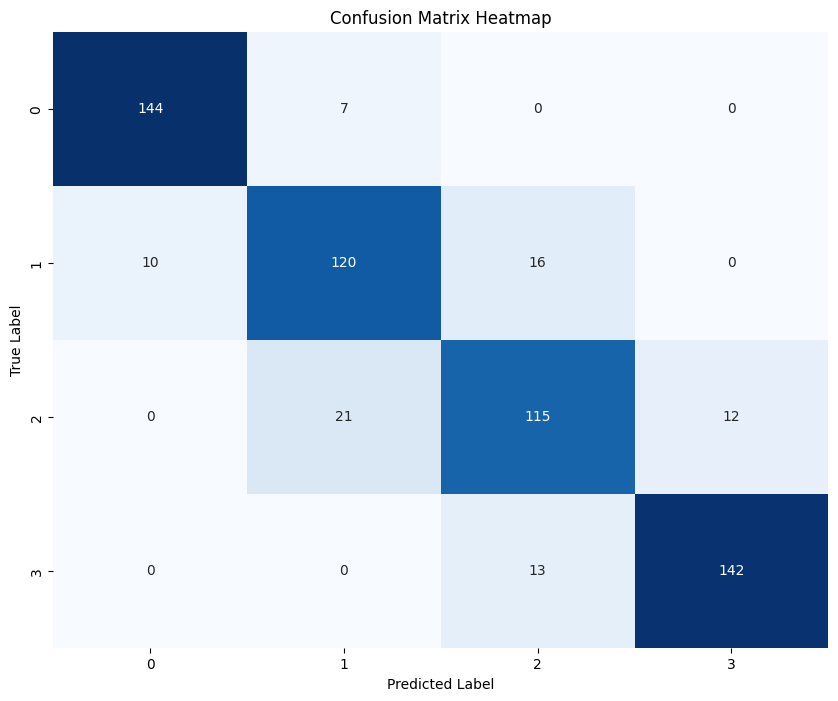

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [41]:
import joblib

print(joblib.dump(model, 'mobile.pkl'))

['mobile.pkl']
